<h1 align ='center'> A credit card company wants to deliver an effective Ad Campaign to gain more card holders </h1>

**Problem:**

Our customers are slowly leaving, this time we want to focus the Ad Campaign on customers that will stay.

1. Explore the Data
  * How many of our current customers have left? 
  * Find differences between those who left and those who stayed
2. Segment the Data
  * Perform segmentation algorithm on our data
  * Gain insight to our segmentations
3. Which candidates should we target for our next campaign?
  * Male vs Female? Old vs Young?
  * What types of Customers create the most revenue for the company?





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
def plot_normalized_vc(col_name,title,fig_num):
  """Plot a bar graph from a pandas data frame showing the normalized 'value counts' of the column"""

  fig, ax = plt.subplots()

  df[col_name].value_counts(normalize= True).plot.bar(fill=False, ax=ax)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.set_title(r"$\bf{"+ "Figure\ {}: ".format(fig_num) + "}$" + title)
  rects = ax.patches

  for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/3,height-rect.get_height()/2, "{:.2f}%".format(height * 100), fontweight='bold')

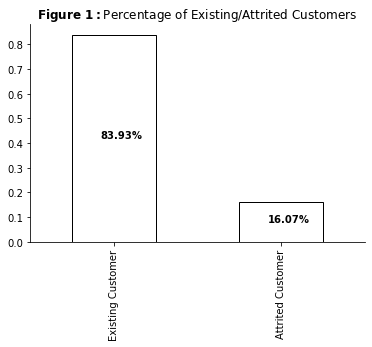

In [7]:
plot_normalized_vc("Attrition_Flag", "Percentage of Existing/Attrited Customers", 1)

**Figure 1** shows that we have lost 16 % of ours Customers.  
We do not want to get customers who will leave.  
We want to focus our Ad Campaign on people who are similar to our existing customers. 

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64


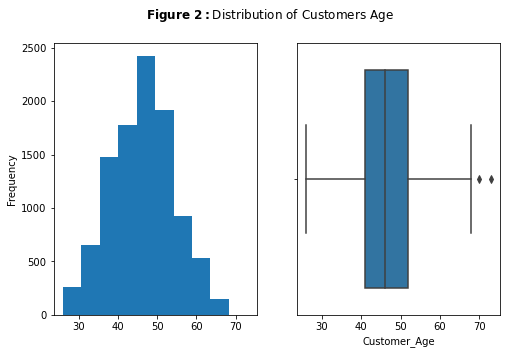

In [8]:
fig, ax = plt.subplots(1,2, figsize= (8,5))
fig.suptitle(r"$\bf{Figure\ 2: }$"+ 'Distribution of Customers Age')
df['Customer_Age'].plot.hist(ax =ax[0])
sns.boxplot(x = df['Customer_Age'], ax=ax[1]);
print(df['Customer_Age'].describe())

**Figure 2** shows that the age of our customers follow a normal distribution.

Most of our customers are 40 - 52 years old. With the median age being 46.   
The youngest customer is 26 years old and the oldest is 73 years old.

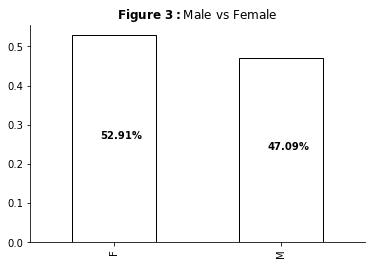

In [9]:
#plot the bar graph
plot_normalized_vc("Gender", "Male vs Female", 3)

**Figure 3** shows a semi even distribution between male and females.   
We would expect to have 50% males and 50% females, however we have 5% more females than males.

Is the 5 percent difference do to chance or something else?

In [10]:
#do a 1 sample t-test to see if the difference between female and males are significant
from scipy.stats import ttest_1samp
#label 0 for male & 1 for female
gender_encoded = pd.get_dummies(df['Gender'])['F']

#.50 is the expected proportion if female = 1 and male = 0
ttest_1samp(gender_encoded, .50)

Ttest_1sampResult(statistic=5.862586246115964, pvalue=4.699545299388183e-09)

Null hypothesis states that the proportion of male to female is .50 or 50%.   
According to the t-test, the null hypothesis is rejected. There is a very slim chance that the ratio of males and females we see is do to chance.

**Females prefer our product more than males by 5%.**




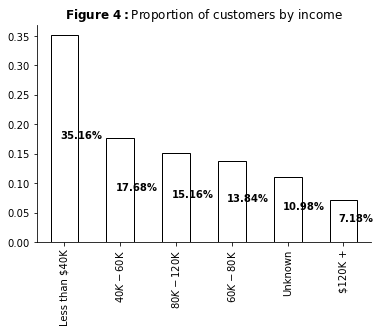

In [11]:
#plot bar graph for income category
plot_normalized_vc("Income_Category",'Proportion of customers by income',4)

**Figure 4** shows that most of our customers are earn less than 40k.  
We do not know the income of 10.98% of our customers.

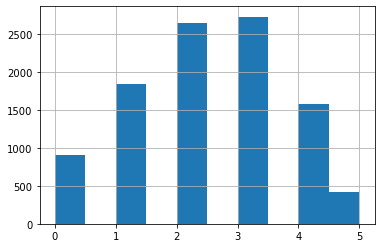

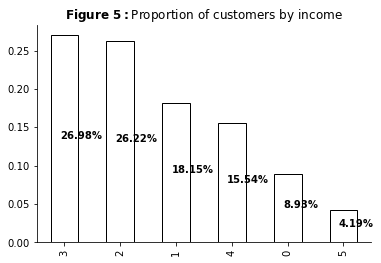

In [12]:
df['Dependent_count'].hist()
plot_normalized_vc("Dependent_count",'Proportion of customers by income',5)

**Figure 5** shows that most of our customers have 3/2 dependents.  
This is expected as the average house hold in USA is 2-3.

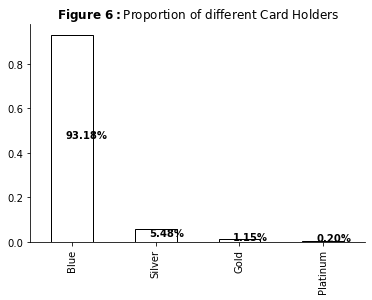

In [9]:
plot_normalized_vc("Card_Category",'Proportion of different Card Holders',6)

**Figure 6** shows that most of our customers are hold the blue card.

 <h1 align = 'center'> Difference between attrited and existing customers </h1> 





In [13]:
attrited_existing = df.groupby("Attrition_Flag").mean().iloc[:,1:-2]

In [14]:
[{i + 1:c} for i,c in enumerate(attrited_existing.columns)]

[{1: 'Customer_Age'},
 {2: 'Dependent_count'},
 {3: 'Months_on_book'},
 {4: 'Total_Relationship_Count'},
 {5: 'Months_Inactive_12_mon'},
 {6: 'Contacts_Count_12_mon'},
 {7: 'Credit_Limit'},
 {8: 'Total_Revolving_Bal'},
 {9: 'Avg_Open_To_Buy'},
 {10: 'Total_Amt_Chng_Q4_Q1'},
 {11: 'Total_Trans_Amt'},
 {12: 'Total_Trans_Ct'},
 {13: 'Total_Ct_Chng_Q4_Q1'},
 {14: 'Avg_Utilization_Ratio'}]

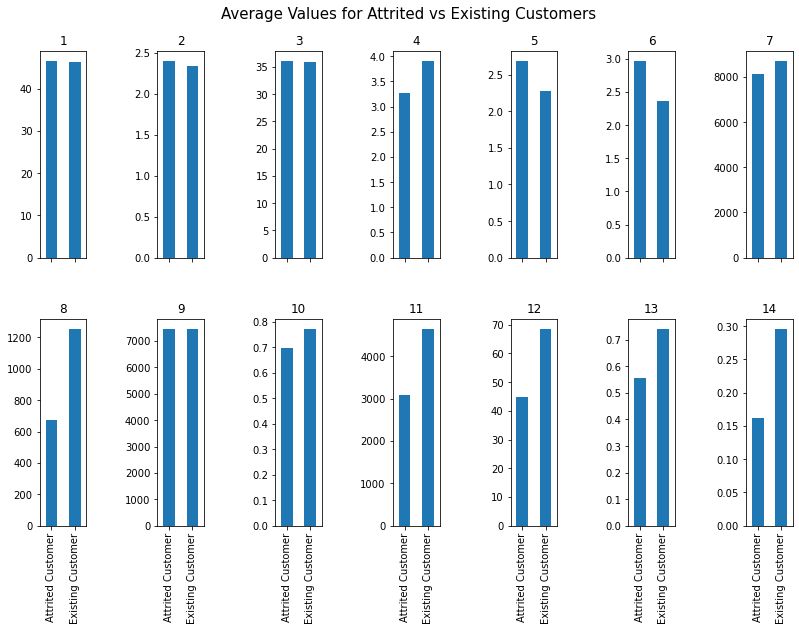

In [18]:
fig, ax = plt.subplots(2,7,figsize = (12,8), squeeze= False)
fig.tight_layout(pad = 4)
for n,c in enumerate(attrited_existing.columns):
  if n < 7:
    attrited_existing[c].T.plot.bar(ax = ax[0,n], title = n + 1)
    ax[0,n].set_xticklabels([])
    ax[0,n].set_xlabel('')
  if n >= 7:
    n = n - 7
    attrited_existing[c].T.plot.bar(ax = ax[1,n], title = n + 8)
    ax[1,n].set_xlabel('')

fig.suptitle("Average Values for Attrited vs Existing Customers", y = 1, fontsize= 15);

Existing Customers have greater amounts of relationships, credit limits, total revolving balance, total transaction amounts, and overall utilize the credits cards more than the attrited customers.

Attrited customers were inactive and used the credit card less before they quit the credit card services.


We can see that on average existing customers have slightly more dependents than attrited customers  

Is this result significant?

<h1 align = 'center'> Statistical test to check significance </h1>
<p style="text-align:center"> Is there a difference between the dependent counts of attrited and existing customers? <p>

<p style="text-align:center">Is there a difference in proportion of female to male between attrited and existing customers? </p>

In [19]:
ndependents_attrited = df[df['Attrition_Flag'] == 'Attrited Customer']['Dependent_count']
ndependents_existing = df[df['Attrition_Flag'] == 'Existing Customer']['Dependent_count']
print(ndependents_existing.var(), ndependents_attrited.var())

1.6984046427605917 1.6256513886589485


In [20]:
from scipy.stats import ttest_ind
ttest_ind(ndependents_attrited,ndependents_existing, equal_var= False)

Ttest_indResult(statistic=1.9398433006370537, pvalue=0.052519604053987055)

Surpisingly according to the 2 sample t-test, the p-value is around .05.   

 This means that if were to have randomly sampled both groups, there is a >5% chance that the differences between the two groups were simply due to luck.

However with an alpha level of .05, there is not significant interaction between the dependent counts of attrited and existing customers.


In [21]:
#place defined array of gender 0: male 1: female to the df
df['gender_encoded'] = gender_encoded
df.groupby('Attrition_Flag')['gender_encoded'].mean()

Attrition_Flag
Attrited Customer    0.571604
Existing Customer    0.520941
Name: gender_encoded, dtype: float64

In [22]:
pgender_attrited = df[df['Attrition_Flag'] == 'Attrited Customer']['gender_encoded']
pgender_existing = df[df['Attrition_Flag'] == 'Existing Customer']['gender_encoded']
print(pgender_attrited.var(), pgender_existing.var())
print(ttest_ind(pgender_attrited,pgender_existing, equal_var= True))

0.24502343978571928 0.24959083075517538
Ttest_indResult(statistic=3.7529997388764267, pvalue=0.0001757076182398843)


The 2 sample t-test shows the p-value to be close to 0.  
This means that the results were not due to chance.   
Attrited customers consists of 5% more females than Existing customers.

<h1 align = 'center'> Gender vs Attrition vs Dependents </h1>

/home/yoon/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


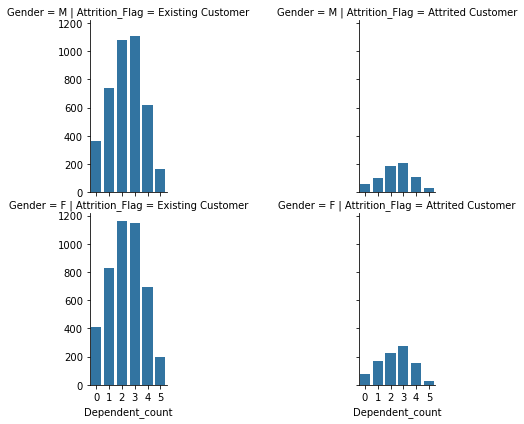

In [23]:
g = sns.FacetGrid(df, col="Attrition_Flag",  row="Gender")
g.map(sns.countplot, "Dependent_count",);
plt.subplots_adjust(hspace=.12, wspace=2.5);

The dependent counts follow a normal distribution for all 4 groups.  
This is expected because the population of dependents counts also follows a normal distribution.

In [24]:
df[df['Income_Category'] =='Less than $40K'].groupby("Attrition_Flag").mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,gender_encoded
Attrition_Flag,,,,,,,,,,,,,,,,,,
Attrited Customer,7.322032e+08,46.428105,2.318627,36.039216,3.468954,2.678105,2.877451,3483.306536,686.114379,2797.192157,0.686773,2865.243464,44.196078,0.543116,0.224935,0.994612,0.005388,0.950980
Existing Customer,7.392355e+08,46.270939,2.252289,35.849101,3.896914,2.302475,2.325534,3810.664937,1240.396745,2570.268193,0.766040,4674.333672,70.711767,0.746770,0.408896,0.000182,0.999818,0.916243


COHORT ANALYSIS

* Time cohort
* Behaviour cohort
* Size cohort

Recency, Frequency, Monetary (RFM) Segmentation



<h1 align = 'center'> Feature Engineering </h1>

In [36]:
bank_data = df[['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].copy()

In [37]:
# Make a list of categorical & numerical columns
categorical_columns = ['Attrition_Flag', 'Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

numerical_columns = []
for i in bank_data.columns:
  if i not in categorical_columns:
    numerical_columns.append(i)    

In [38]:
bank_data[numerical_columns]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [39]:
from sklearn.preprocessing import StandardScaler

num_cols_standardized = StandardScaler().fit_transform(bank_data[numerical_columns])

In [40]:
bank_data.loc[:,numerical_columns]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [46]:
#map the numerical columns with its standardized form
bank_data.loc[:,numerical_columns] = num_cols_standardized
bank_data.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6002,Attrited Customer,-1.412845,F,2.043199,High School,Married,$40K - $60K,Blue,-1.368442,-0.522785,-0.337598,3.204463,-0.791527,-1.426858,-0.663441,0.013957,-0.560526,-0.888685,-0.820006,-0.997155
3480,Existing Customer,-0.539638,F,0.503368,Graduate,Single,Less than $40K,Blue,-0.116254,0.763943,-0.337598,1.396424,-0.334050,-0.094257,-0.325529,-0.788977,-0.149571,0.006020,0.188083,-0.293435
3334,Existing Customer,0.458314,M,-1.036462,High School,Single,$40K - $60K,Blue,0.384621,0.120579,-1.327136,-1.315636,-0.683399,-0.164200,-0.668535,-0.387510,-0.596735,-0.377425,0.158680,0.544499
8501,Existing Customer,-1.662333,F,-1.036462,Graduate,Single,$40K - $60K,Blue,-1.994536,-1.166148,-0.337598,0.492404,-0.412502,-1.426858,-0.284496,-0.163966,0.061500,0.730306,1.208772,-0.997155
8379,Attrited Customer,-0.165406,F,-0.266547,Graduate,Single,Less than $40K,Blue,-0.366692,-1.809512,0.651940,1.396424,-0.785618,-1.426858,-0.657534,-1.176758,-0.569652,-1.144315,-1.870098,-0.997155


In [47]:
#get the index location of the categorical columns
cat_cols_index = [bank_data.columns.get_loc(i) for i in categorical_columns]

#set categorical types as category to save some memory
bank_data[categorical_columns] = bank_data[categorical_columns].astype('category').copy()

In [48]:
print(cat_cols_index)

[0, 2, 4, 5, 6, 7]


<h1 align ='center'> Unsupervised Learning </h1>
<h4 align ='center'> Clustering Using KPrototypes </h4>
<br> </br>
In our data set we have both numerical and categorical data.   

Kmeans works best with numerical data and Kmodes works best with categorical data.   

We will use KPrototypes which is a mixture of both.   

In [49]:
from kmodes.kprototypes import KPrototypes

#get the index position of the categorical columns
cat_cols_index = [bank_data.columns.get_loc(i) for i in categorical_columns]

#create a loop to get the cost inorder to find the optimal number of clusters
cost = []
for num_clusters in np.arange(1,10):
  kproto = KPrototypes(n_clusters= num_clusters, n_init = 1, max_iter = 50)
  kproto.fit_predict(bank_data, categorical = cat_cols_index)
  cost.append(kproto.cost_)

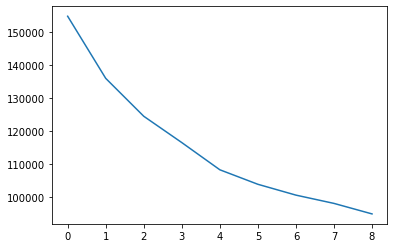

In [50]:
plt.plot(cost)

The elbow is not too clear but we will use 4 clusters

In [51]:
#use 4 clusters and fit the data
kproto = KPrototypes(n_clusters= 4, n_init = 1, max_iter = 50)
cluster = kproto.fit_predict(bank_data, categorical = cat_cols_index)

#map the clusters into the original df for better interpretation
#(that has the original numerical values NOT standardized)
df['cluster'] = cluster

<h2 align ='center'>Pickle our clusters</h2>
<p style="text-align:center">Pickle the clusters so that we do not have to run the model again</p>

In [54]:
import pickle

filename = 'clusters.sav'
pickle.dump(cluster, open(filename, 'wb'))
  
# load the model from disk
clusters = pickle.load(open(filename, 'rb'))

In [55]:
clusters

array([0, 3, 3, ..., 0, 0, 3], dtype=uint16)

<h2 align ='center'> 4 Segments </h2>

In [92]:
#encode attrition_flag to binary. 1 = existing 0 = attrited
df['existing_customers'] = pd.get_dummies(df['Attrition_Flag']).iloc[:,1]

In [99]:
df.groupby('cluster').mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,gender_encoded,existing_customers
cluster,,,,,,,,,,,,,,,,,,,
0,7.377095e+08,43.983351,2.592785,33.901492,3.901838,2.424211,2.640305,6150.916060,352.326396,5798.589664,0.716720,3484.615678,58.697190,0.650778,0.055997,0.317030,0.682970,0.571974,0.681582
1,7.395189e+08,46.271619,2.541497,35.944283,3.427742,2.295995,2.408590,25812.748114,1238.262333,24574.485781,0.768193,6312.222867,73.384794,0.718925,0.053465,0.115088,0.884912,0.142774,0.884504
2,7.425575e+08,55.894162,1.429046,44.538681,4.204556,2.393450,2.516849,5313.683199,1384.401044,3929.282155,0.756961,3182.585667,55.615567,0.709767,0.371671,0.134620,0.865380,0.581870,0.864737
3,7.381592e+08,42.426479,2.605448,32.318102,3.689514,2.261570,2.284710,4104.103281,1672.408319,2431.694962,0.794113,4971.402168,71.463386,0.762243,0.511769,0.065717,0.934283,0.655243,0.934095


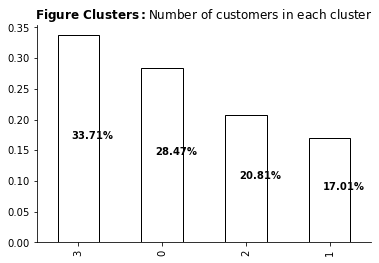

In [101]:
plot_normalized_vc('cluster','Number of customers in each cluster','Clusters')

The figure above shows that most of our customers belong in cluster 3

Cluster 0 consists of mostly female customers (57%) that are mostly attrited. They do not use the credit card, and have an average utilization ratio of .055. Their total revolving balance is the lowest out of all 4 clusters.

Cluster 1 consists of mostly Male customers. Around 14.30% of the customers in cluster 1 are males. 88% of them are existing customers. Their average utlization ratio is lowest at .054. However, this is the group that has the highest credit limit and the highest open to buy. This group has a high limit, but does not use its credit card.

Cluster 2 consists of mostly female customers (58%). 86.47% of the these customers are existing customers. This group has the second highest average utilization ratio at 37%. This cluster has the oldest customers with an average of 56 years. They also have the least amount of dependents at 1.4 compared to the others around 2.5. These customers are loyal and stayed with us the longest with an average months on books of 44.5 months.

Cluster 3 consists of 65.55% female customers and 93.40% of the these customers are existing customers. These customers have an average utilization ratio of .511. These customers have the greatest total revolving balance, yet their credit limit is the lowest. These customers are also the youngest with an average age of 42 years. Cluster 3 is also the cluster with the most amount of customers.

<h3 align ='center'> Checking the income for each cluster </h3>

In [105]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [124]:
income_cluster = df[['Income_Category','cluster']].copy()
#remove unknown income from the rest
income_cluster[income_cluster['Income_Category'] != "Unknown"]

mapper = {'Less than $40K':1, '$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}

income_cluster.iloc[:,0] = income_cluster['Income_Category'].map(mapper)

In [126]:
income_cluster.groupby('cluster').mean()

,Income_Category
cluster,
0,2.187128
1,3.797280
2,2.129550
3,1.871679


<h1 align ='center'> Recommendations </h1>

Although most of our attrited customers are females, this is because most of our customers in general are females. From this we can deduce the population for our advertisements and market to female customers. 
From there we can further deduce the population and market towards lower income customers. 
Low income customers tend to spend their credits cards a lot more than the rest of the groups.
And unsurpisingly lower income customers are those who are on average younger than the rest.

For our next Ad Campaign we should target **young low income females**